# Final Project

# Group Member

1.Spoorthi Bellam

2.Prasanth Thota



### What we tried to do: 
We are working on a project to predict the sales prices of houses. For each Id in the test set,we should be able to predict the value of the Sales Price variable. We have retrieved data from 
Beeviva and did EDA, used various regression techniques, applied ensemble Model and also applied Neural Network for tensor flow to get the best results. To predict the sales prices we have to take RMSE on logs of the predictions and targets, which makes it the RMSLE and have to get that score which is shown below.

There is a need to predict the efficient house pricing for real estate customers with respect to their budgets and priorities. This paper efficiently analyses previous market trends and price ranges, to predict future prices. This topic brings together the latest research on prediction markets to further their utilization by economic forecasters

The main goal of the model used in the paper is to different values for the dependent variable based on several independent variables by using different regression techniques and then comparing the results and their accuracy by RMSE value and plotting the best results.

### Procedures Followed:


1.	Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2.	Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3.	Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4.	Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5.	Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


# Methods used for House Prices Forecasting using Ensemble and Tensorflow

•Exploratory Data Analysis

•Linear regression model implementation.

•Ensemble.

•Applying neural network using Tensorflow

# Algorithm Using or Method used:

# Ensemble And TensorFlow

1)Imputing missing values by proceeding sequentially through the data

2)Transforming some numerical variables that seem really categorical

3)Label Encoding some categorical variables that may contain information in their ordering set

4)Box Cox Transformation of skewed features (instead of log-transformation) : This gave me a slightly better result both on leaderboard and cross-validation.

5)Getting dummy variables for categorical features.

Then we choose many base models (mostly sklearn based models + sklearn API of DMLC's XGBoost and Microsoft's LightGBM), 
cross-validate them on the data before stacking/ensembling them. The key here is to make the (linear) models robust to outliers. This improved the result both on LB and cross-validation.

# Importing Python Libraries

In [32]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn import preprocessing



pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points




## DATASET INTRODUCTION and Idea:
 
 - We shall predict saleprice in this project of houses.We use all the other columns as independent variables and saleprice as dependent variable. We train our models with train data and we test using test data to evaluate the performance of the model
 - Now this model will help people ownig houses willing to sell and do not know what market price the house has.
 - We clean the data and use regression models and then we use ensemble and tensor flow and copare the performances.
    
    
    
    
    

### This dataset is taken from Beeviva : http://www.bee-viva.com/competitions/ames

In [25]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('/Users/spoorthi/Desktop/train.csv')
test = pd.read_csv('/Users/spoorthi/Desktop/test.csv')

In [26]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [27]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.000,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,nan,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.000,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.000,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.000,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


# Data Processing
# Outliers¶

### SalePrice is our dependent variable

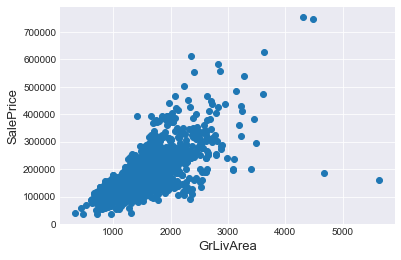

In [39]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.


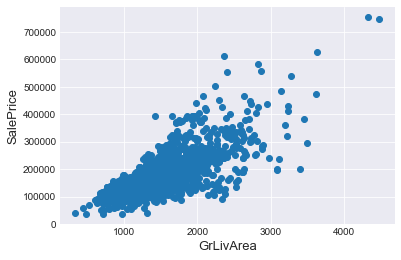

In [40]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


# Target Variable
SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 180932.92 and sigma = 79467.79



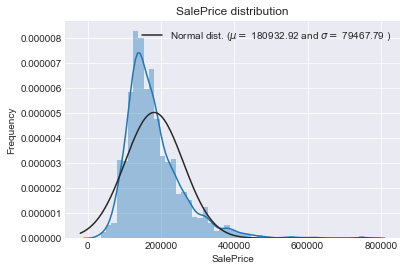

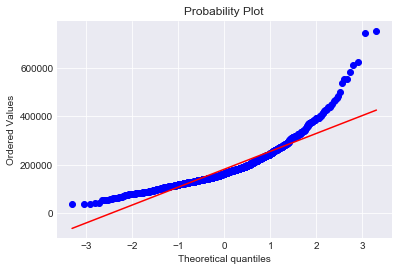

In [41]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Features engineering¶


- let's first concatenate the train and test data in the same dataframe



In [43]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


Text(0.5,1,'Percent missing data by feature')

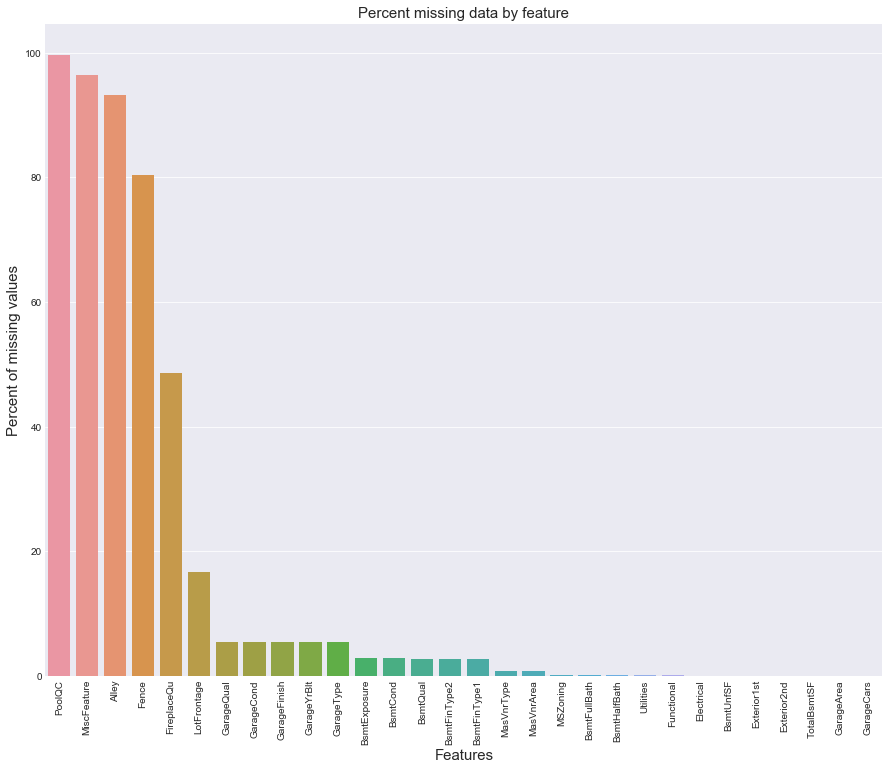

In [45]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


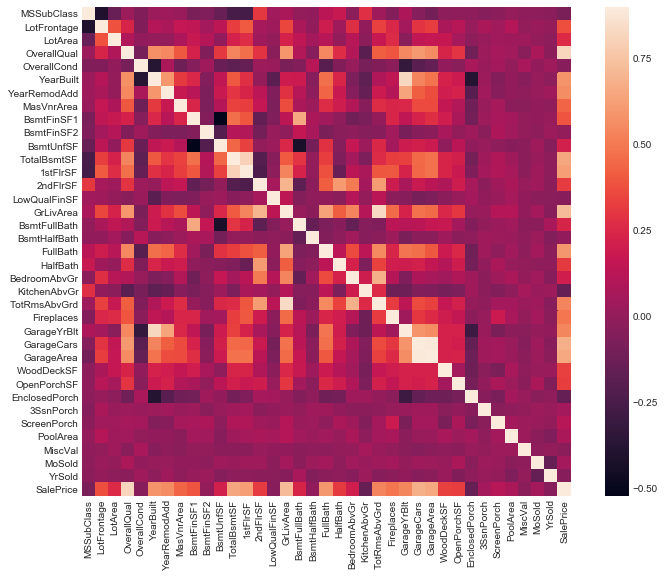

In [46]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)



'TotalBsmtSF' and 'GrLiveArea' in this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).
The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function. We can also see this same tendency in the upper limit of the 'dots cloud. Also, notice how the set of dots regarding the last years tend to stay above this limt that is ,prices are increasing faster now.

    -OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 
    -'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables.The number of cars that fit into the       garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to       distinguish them.
    -'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was       right 
    -'TotRmsAbvGrd' and 'GrLivArea',are similar again.
    -It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. 

# Feature Engineering

In [67]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [68]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


## Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each h

In [69]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Skewed features



In [70]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.

See this page for more details on Box Cox Transformation as well as the scipy function's page

In [71]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [73]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [74]:
train

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.693,11.686,0.000,0.730,1.541,1.820,1.541,11.170,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
1,12.792,0.000,0.000,0.730,1.541,1.820,0.730,12.063,0.000,0.000,...,0,0,0,0,0,0,0,0,0,1
2,11.892,11.725,0.000,0.730,1.541,1.820,1.194,10.200,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
3,12.014,11.354,0.000,0.730,1.541,0.730,1.541,8.274,0.000,0.000,...,0,0,0,0,0,0,0,0,0,1
4,12.511,12.271,0.000,0.730,1.820,1.820,0.000,10.971,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
5,11.494,10.590,9.178,0.730,0.730,1.820,1.541,11.267,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
6,13.670,0.000,0.000,0.730,1.541,1.820,0.000,13.031,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1
7,12.414,12.077,0.000,0.730,1.541,1.820,1.194,11.702,4.597,0.000,...,0,0,0,0,0,0,0,0,0,1
8,12.187,11.340,0.000,0.730,1.194,1.820,1.541,0.000,0.000,2.260,...,0,0,0,0,0,0,0,0,0,1
9,12.335,0.000,0.000,0.730,1.194,1.820,1.541,11.677,0.000,1.194,...,0,0,0,0,0,0,0,0,0,1


# Modelling
Import librairies

In [75]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

Define a cross validation strategy

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation



In [76]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


# Base models
LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [77]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [78]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=1, random_state=3))


In [79]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


In [80]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [81]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [82]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [85]:
xgb_random.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1147}

In [88]:
lgb_random.best_params_

{'learning_rate': 0.07, 'max_depth': 2, 'n_estimators': 524}

In [91]:
G_random.best_params_

{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 2743}

In [92]:
alpha = [0.0005,0.5,1,0.02]



# Create the random grid
lasso_random_grid = {'alpha': alpha,
               }
print(lasso_random_grid)

{'alpha': [0.0005, 0.5, 1, 0.02]}


# Base models scores
Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [94]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [95]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1115 (0.0074)



In [96]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [97]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.1177 (0.0080)



In [98]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Xgboost score: 0.1157 (0.0063)



In [99]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1162 (0.0071)



# Evaluation for base model scores:

- Lasso score: 0.1115 (0.0074)
- ElasticNet score: 0.1115 (0.0074)
- Kernel Ridge score: 0.1153 (0.0075)
- Gradient Boosting score: 0.1177 (0.0080)
- Xgboost score: 0.1157 (0.0063)
- LGBM score: 0.1162 (0.0071)

### Of all the models we see that Xgboost has the least error. That means its the best model.



# Stacking averaged Models Class



Less simple Stacking : Adding a Meta-model
In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

Split the total training set into two disjoint sets (here train and .holdout )

Train several base models on the first part (train)

Test these base models on the second part (holdout)

Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

In [102]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [103]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1085 (0.0074)


# Evaluation of stacked Models.




In [104]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.00613622457634


In [105]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.00610151572532


In [106]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))


0.00569480558264


In [107]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.00591327983854


In [108]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15


In [109]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)


In [110]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


### We see stacking(0.0074) has lesser error when compared to averaging(0.0075)

# Lets apply Tensor flow for this data set

In [8]:
import tensorflow as tf
from tensorflow.python.framework import ops


### Lets Define functions for each and combine at the end.

In [9]:
def load_data(train_path, test_path):
    """
    method for data loading
    :param train_path: path for the train set file
    :param test_path: path for the test set file
    :return: a 'pandas' array for each set
    """

    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)

    print("number of training examples = " + str(train_data.shape[0]))
    print("number of test examples = " + str(test_data.shape[0]))
    print("train shape: " + str(train_data.shape))
    print("test shape: " + str(test_data.shape))

    return train_data, test_data


    :param test_ids: vector with test dataset ids
    :param predictions: vector with test dataset predictions
    :param id_column: name of the output id column
    :param predction_column: name of the output predction column
    :param file_name: string for the output file name
    :return: output a csv with ids ands predictions
    

In [10]:
def output_submission(test_ids, predictions, id_column, predction_column, file_name):
    

    print('Outputting submission...')
    with open('submissions/' + file_name, 'w') as submission:
        writer = csv.writer(submission)
        writer.writerow([id_column, predction_column])
        for test_id, test_prediction in zip(test_ids, predictions):
            writer.writerow([test_id, test_prediction])
    print('Output complete')

## We get dummies of the column in this process and we shall name this method preprocess.


    Perform a number of pre process functions on the data set
    :param df: pandas data frame
    :return: processed data frame
    

In [65]:
def pre_process_data(df):
    
    # one-hot encode categorical values
    df = pd.get_dummies(df)

    return df


### We create the minibatches now.


    Generate mini batches from the data set (data and labels)
    :param train_set: data set with the examples
    :param train_labels: data set with the labels
    :param mini_batch_size: mini batch size
    :return: mini batches
    

In [12]:
def mini_batches(train_set, train_labels, mini_batch_size):
    
    set_size = train_set.shape[0]
    batches = []
    num_complete_minibatches = set_size // mini_batch_size

    for k in range(0, num_complete_minibatches):
        mini_batch_x = train_set[k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch_y = train_labels[k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch = (mini_batch_x, mini_batch_y)
        batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if set_size % mini_batch_size != 0:
        mini_batch_x = train_set[(set_size - (set_size % mini_batch_size)):]
        mini_batch_y = train_labels[(set_size - (set_size % mini_batch_size)):]
        mini_batch = (mini_batch_x, mini_batch_y)
        batches.append(mini_batch)

    return batches

- Whereas placeholder doesn’t require initial value. Placeholder simply allocates block of memory for future use.       Later, we can use feed_dict to feed the data into placeholder. By default, placeholder has an unconstrained shape,     which allows you to feed tensors of different shapes in a session.


    Creates the placeholders for the tensorflow session.
    :param input_size: scalar, input size
    :param output_size: scalar, output size
    :return: X  placeholder for the data input, of shape [None, input_size] and dtype "float"
    :return: Y placeholder for the input labels, of shape [None, output_size] and dtype "float"
    

In [13]:
def create_placeholders(input_size, output_size):
    

    x = tf.placeholder(shape=(None, input_size), dtype=tf.float32, name="X")
    y = tf.placeholder(shape=(None, output_size), dtype=tf.float32, name="Y")

    return x, y



- """
    Implement forward propagation with dropout for the [LINEAR->RELU]*(L-1)->LINEAR-> computation
    :param x: data, pandas array of shape (input size, number of examples)
    :param parameters: output of initialize_parameters()
    :param keep_prob: probability to keep each node of the layer
    :param hidden_activation: activation function of the hidden layers
    :return: last LINEAR value
    """

In [14]:
def forward_propagation(x, parameters, keep_prob=1.0, hidden_activation='relu'):
    

    a_dropout = x
    n_layers = len(parameters) // 2  # number of layers in the neural network

    for l in range(1, n_layers):
        a_prev = a_dropout
        a_dropout = linear_activation_forward(a_prev, parameters['w%s' % l], parameters['b%s' % l], hidden_activation)

        if keep_prob < 1.0:
            a_dropout = tf.nn.dropout(a_dropout, keep_prob)

    al = tf.matmul(a_dropout, parameters['w%s' % n_layers]) + parameters['b%s' % n_layers]

    return al


"""
    Implement the forward propagation for the LINEAR->ACTIVATION layer
    :param a_prev: activations from previous layer (or input data): (size of previous layer, number of examples)
    :param w: weights matrix: numpy array of shape (size of current layer, size of previous layer)
    :param b: bias vector, numpy array of shape (size of the current layer, 1)
    :param activation: the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    :return: the output of the activation function, also called the post-activation value
    """

In [15]:
def linear_activation_forward(a_prev, w, b, activation):
    

    a = None
    if activation == "sigmoid":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.sigmoid(z)

    elif activation == "relu":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.relu(z)

    elif activation == "leaky relu":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.leaky_relu(z)

    return a

"""
    :param layer_dims: python array (list) containing the dimensions of each layer in our network
    :return: python dictionary containing your parameters "w1", "b1", ..., "wn", "bn":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

In [16]:
def initialize_parameters(layer_dims):
    

    parameters = {}
    n_layers = len(layer_dims)

    for l in range(1, n_layers):
        parameters['w' + str(l)] = tf.get_variable('w' + str(l), [layer_dims[l - 1], layer_dims[l]],
                                                   initializer=tf.contrib.layers.xavier_initializer())
        parameters['b' + str(l)] = tf.get_variable('b' + str(l), [layer_dims[l]], initializer=tf.zeros_initializer())

    return parameters


"""
    :param z3: output of forward propagation (output of the last LINEAR unit)
    :param y: "true" labels vector placeholder, same shape as Z3
    :return: Tensor of the cost function (RMSE as it is a regression)
    """
"""
    make a prediction based on a data set and parameters
    :param data: based data set
    :param parameters: based parameters
    :return: array of predictions
    """

In [17]:
def compute_cost(z3, y):
    

    cost = tf.sqrt(tf.reduce_mean(tf.square(y - z3)))

    return cost


def predict(data, parameters):
    

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)

        dataset = tf.cast(tf.constant(data), tf.float32)
        fw_prop_result = forward_propagation(dataset, parameters)
        prediction = fw_prop_result.eval()

    return prediction

"""
    calculate cost between two data sets
    :param predictions: data set of predictions
    :param labels: data set of labels (real values)
    :return: percentage of correct predictions
    """
"""
    calculate cost between two data sets
    :param predictions: data set of predictions
    :param labels: data set of labels (real values)
    :return: percentage of correct predictions
    """

In [18]:
def rmse(predictions, labels):
    

    prediction_size = predictions.shape[0]
    prediction_cost = np.sqrt(np.sum(np.square(labels - predictions)) / prediction_size)

    return prediction_cost


def rmsle(predictions, labels):
    

    prediction_size = predictions.shape[0]
    prediction_cost = np.sqrt(np.sum(np.square(np.log(predictions + 1) - np.log(labels + 1))) / prediction_size)

    return prediction_cost


    Function to apply l2 regularization to the model
    :param cost: usual cost of the model
    :param l2_beta: beta value used for the normalization
    :param parameters: parameters from the model (used to get weights values)
    :param n_layers: number of layers of the model
    :return: cost updated
    

In [19]:
def l2_regularizer(cost, l2_beta, parameters, n_layers):
    

    regularizer = 0
    for i in range(1, n_layers):
        regularizer += tf.nn.l2_loss(parameters['w%s' % i])

    cost = tf.reduce_mean(cost + l2_beta * regularizer)

    return cost



    builds a string (submission file name), based on the model parameters
    :param layers_dims: model layers dimensions
    :param num_epochs: model number of epochs
    :param lr_decay: model learning rate decay
    :param learning_rate: model learning rate
    :param l2_beta: beta used on l2 normalization
    :param keep_prob: keep probability used on dropout normalization
    :param minibatch_size: model mini batch size (0 to do not use mini batches)
    :param num_examples: number of model examples (training data)
    :return: built string
    

In [20]:
def build_submission_name(layers_dims, num_epochs, lr_decay,
                          learning_rate, l2_beta, keep_prob, minibatch_size, num_examples):
    
    submission_name = 'ly{}-epoch{}.csv' \
        .format(layers_dims, num_epochs)

    if lr_decay != 0:
        submission_name = 'lrdc{}-'.format(lr_decay) + submission_name
    else:
        submission_name = 'lr{}-'.format(learning_rate) + submission_name

    if l2_beta > 0:
        submission_name = 'l2{}-'.format(l2_beta) + submission_name

    if keep_prob < 1:
        submission_name = 'dk{}-'.format(keep_prob) + submission_name

    if minibatch_size != num_examples:
        submission_name = 'mb{}-'.format(minibatch_size) + submission_name

    return submission_name


    :param train_costs: array with the costs from the model training
    :param validation_costs: array with the costs from the model validation
    :param submission_name: name of the submission (used for the plot title)
    :return:


In [21]:
def plot_model_cost(train_costs, validation_costs, submission_name):
    
    plt.plot(np.squeeze(train_costs), label='Train cost')
    plt.plot(np.squeeze(validation_costs), label='Validation cost')
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Model: " + submission_name)
    plt.legend()
    plt.show()


    :param train_set: training set
    :param train_labels: training labels
    :param validation_set: validation set
    :param validation_labels: validation labels
    :param layers_dims: array with the layer for the model
    :param learning_rate: learning rate of the optimization
    :param num_epochs: number of epochs of the optimization loop
    :param print_cost: True to print the cost every 500 epochs
    :param plot_cost: True to plot the train and validation cost
    :param l2_beta: beta parameter for the l2 regularization
    :param keep_prob: probability to keep each node of each hidden layer (dropout)
    :param hidden_activation: activation function to be used on the hidden layers
    :param return_best: True to return the highest params from all epochs
    :param minibatch_size: size of th mini batch
    :param lr_decay: if != 0, sets de learning rate decay on each epoch
    :return parameters: parameters learnt by the model. They can then be used to predict.
    :return submission_name: name for the trained model


In [28]:

def model(train_set, train_labels, validation_set, validation_labels, layers_dims, learning_rate=0.01, num_epochs=1001,
          print_cost=True, plot_cost=True, l2_beta=0., keep_prob=1.0, hidden_activation='relu', return_best=False,
          minibatch_size=0, lr_decay=0):
    

    ops.reset_default_graph()  # to be able to rerun the model without overwriting tf variables

    input_size = layers_dims[0]
    output_size = layers_dims[-1]
    num_examples = train_set.shape[0]
    n_layers = len(layers_dims)
    train_costs = []
    validation_costs = []
    best_iteration = [float('inf'), 0]
    best_params = None

    if minibatch_size == 0 or minibatch_size > num_examples:
        minibatch_size = num_examples

    num_minibatches = num_examples // minibatch_size

    if num_minibatches == 0:
        num_minibatches = 1

    submission_name = build_submission_name(layers_dims, num_epochs, lr_decay, learning_rate, l2_beta, keep_prob,
                                            minibatch_size, num_examples)

    x, y = create_placeholders(input_size, output_size)
    tf_valid_dataset = tf.cast(tf.constant(validation_set), tf.float32)
    parameters = initialize_parameters(layers_dims)

    fw_output_train = forward_propagation(x, parameters, keep_prob, hidden_activation)
    train_cost = compute_cost(fw_output_train, y)

    fw_output_valid = forward_propagation(tf_valid_dataset, parameters, keep_prob, hidden_activation)
    validation_cost = compute_cost(fw_output_valid, validation_labels)

    if l2_beta > 0:
        train_cost = l2_regularizer(train_cost, l2_beta, parameters, n_layers)
        validation_cost = l2_regularizer(validation_cost, l2_beta, parameters, n_layers)

    if lr_decay != 0:
        global_step = tf.Variable(0, trainable=False)
        learning_rate = tf.train.inverse_time_decay(learning_rate, global_step=global_step, decay_rate=lr_decay,
                                                    decay_steps=1)
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(train_cost, global_step=global_step)
    else:
        optimizer = tf.train.AdamOptimizer(learning_rate).minimize(train_cost)

    # uncomment to use tensorboard
    # tf.summary.scalar('train cost', train_cost)
    # tf.summary.scalar('validation cost', validation_cost)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        # uncomment to use tensorboard
        # writer = tf.summary.FileWriter('logs/'+submission_name, sess.graph)

        sess.run(init)

        for epoch in range(num_epochs):
            train_epoch_cost = 0.
            validation_epoch_cost = 0.

            minibatches = mini_batches(train_set, train_labels, minibatch_size)

            for minibatch in minibatches:
                # uncomment to use tensorboard
                # merge = tf.summary.merge_all()

                (minibatch_X, minibatch_Y) = minibatch
                feed_dict = {x: minibatch_X, y: minibatch_Y}

                # uncomment to use tensorboard
                # _, summary, minibatch_train_cost, minibatch_validation_cost = sess.run(
                #     [optimizer, merge, train_cost, validation_cost], feed_dict=feed_dict)

                # comment to use tensorboard
                _, minibatch_train_cost, minibatch_validation_cost = sess.run(
                    [optimizer, train_cost, validation_cost], feed_dict=feed_dict)

                train_epoch_cost += minibatch_train_cost / num_minibatches
                validation_epoch_cost += minibatch_validation_cost / num_minibatches

            if print_cost is True and epoch % 500 == 0:
                print("Train cost after epoch %i: %f" % (epoch, train_epoch_cost))
                print("Validation cost after epoch %i: %f" % (epoch, validation_epoch_cost))

            if plot_cost is True and epoch % 10 == 0:
                train_costs.append(train_epoch_cost)
                validation_costs.append(validation_epoch_cost)

            # uncomment to use tensorboard
            # if epoch % 10 == 0:
            #     writer.add_summary(summary, epoch)

            if return_best is True and validation_epoch_cost < best_iteration[0]:
                best_iteration[0] = validation_epoch_cost
                best_iteration[1] = epoch
                best_params = sess.run(parameters)

        if return_best is True:
            parameters = best_params
        else:
            parameters = sess.run(parameters)

        print("Parameters have been trained, getting metrics...")

        train_rmse = rmse(predict(train_set, parameters), train_labels)
        validation_rmse = rmse(predict(validation_set, parameters), validation_labels)
        train_rmsle = rmsle(predict(train_set, parameters), train_labels)
        validation_rmsle = rmsle(predict(validation_set, parameters), validation_labels)

        print('Train rmse: {:.4f}'.format(train_rmse))
        print('Validation rmse: {:.4f}'.format(validation_rmse))
        print('Train rmsle: {:.4f}'.format(train_rmsle))
        print('Validation rmsle: {:.4f}'.format(validation_rmsle))

        submission_name = 'tr_cost-{:.2f}-vd_cost{:.2f}-'.format(train_rmse, validation_rmse) + submission_name

        if return_best is True:
            print('Lowest rmse: {:.2f} at epoch {}'.format(best_iteration[0], best_iteration[1]))

        if plot_cost is True:
            plot_model_cost(train_costs, validation_costs, submission_name)

        return parameters, submission_name

In [62]:
TRAIN_PATH = '/Users/prasanth/Desktop/train.csv'
TEST_PATH = '/Users/prasanth/Desktop/test.csv'

train, test = load_data(TRAIN_PATH, TEST_PATH)

# get the labels values
train_raw_labels = train['SalePrice'].to_frame().as_matrix()


number of training examples = 1460
number of test examples = 1459
train shape: (1460, 81)
test shape: (1459, 80)


In [63]:
# pre process data sets
train_pre = pre_process_data(train)
test_pre = pre_process_data(test)

# drop unwanted columns
train_pre = train_pre.drop(['Id', 'SalePrice'], axis=1)
test_pre = test_pre.drop(['Id'], axis=1)

# align both data sets (by outer join), to make they have the same amount of features,
# this is required because of the mismatched categorical values in train and test sets
train_pre, test_pre = train_pre.align(test_pre, join='outer', axis=1)

# replace the nan values added by align for 0
train_pre.replace(to_replace=np.nan, value=0, inplace=True)
test_pre.replace(to_replace=np.nan, value=0, inplace=True)

train_pre = train_pre.as_matrix().astype(np.float)
test_pre = test_pre.as_matrix().astype(np.float)

In [138]:
# scale values
standard_scaler = preprocessing.StandardScaler()
train_pre = standard_scaler.fit_transform(train_pre)
test_pre = standard_scaler.fit_transform(test_pre)

X_train, X_valid, Y_train, Y_valid = train_test_split(train_pre, train_raw_labels, test_size=0.3, random_state=1)

In [139]:
# hyperparameters
input_size = train_pre.shape[1]
output_size = 1
num_epochs = 10000
learning_rate = 0.01
layers_dims = [input_size, 500, 500, output_size]

Train cost after epoch 0: 201488.796875
Validation cost after epoch 0: 202926.234375
Train cost after epoch 500: 44425.832031
Validation cost after epoch 500: 53016.570312
Train cost after epoch 1000: 40389.011719
Validation cost after epoch 1000: 49227.957031
Train cost after epoch 1500: 39186.335938
Validation cost after epoch 1500: 47273.546875
Train cost after epoch 2000: 38038.609375
Validation cost after epoch 2000: 44322.210938
Train cost after epoch 2500: 37971.179688
Validation cost after epoch 2500: 46067.976562
Train cost after epoch 3000: 37197.140625
Validation cost after epoch 3000: 44950.937500
Train cost after epoch 3500: 37700.500000
Validation cost after epoch 3500: 45192.320312
Train cost after epoch 4000: 37946.234375
Validation cost after epoch 4000: 44503.820312
Train cost after epoch 4500: 37105.894531
Validation cost after epoch 4500: 44281.605469
Train cost after epoch 5000: 38147.890625
Validation cost after epoch 5000: 46715.992188
Train cost after epoch 5500

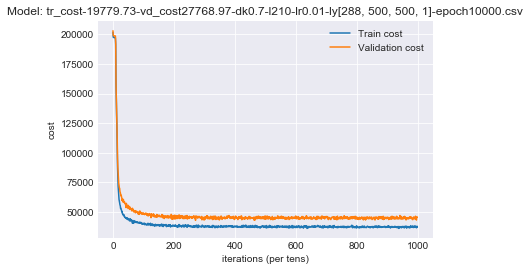

In [140]:
parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid, layers_dims, num_epochs=num_epochs,
                                    learning_rate=learning_rate, print_cost=True, plot_cost=True, l2_beta=10,
                                    keep_prob=0.7, minibatch_size=0, return_best=True)

In [141]:
print(submission_name)
prediction = list(map(lambda val: float(val), predict(test_pre, parameters)))
# uncomment if label was log transformed
prediction = list(map(lambda val: np.expm1(val), prediction))
# output_submission(test.Id.values, prediction, 'Id', 'SalePrice', submission_name)

tr_cost-19779.73-vd_cost27768.97-dk0.7-l210-lr0.01-ly[288, 500, 500, 1]-epoch10000.csv


/Users/prasanth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in expm1
  after removing the cwd from sys.path.


# Conclusion:

•	The description mentions to get the sales prices RMSE on logs of the predictions and targets, which makes it the RMSLE values so we found the RMSLE value to get the best scores.
•	We see that the stacking which has a Rmsle error =0.0074 has greater performance compared to average ensemble which has Rmsle error= 0.0075 Because stacking takes a calculated weightage whereas averaging takes an average of all.

•	The averaging method is not intuitive and thus it’s not efficient.

•	First simplest stacking approach really improved the score. This encouraged us to go further and explore a less simple stacking approach.

•	We philosophised about the variables, we analysed 'Sales Price' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

•	I wanted to focus mainly on feature engineering and the stacking technique. I think stacking is a very useful tool to have within your Data Science toolkit.

•	Evaluation for base model scores:

       - Lasso score: 0.1115 (0.0074)
       - ElasticNet score: 0.1115 (0.0074)
       - Kernel Ridge score: 0.1153 (0.0075)
       - Gradient Boosting score: 0.1177 (0.0080)
       - Xgboost score: 0.1157 (0.0063)
       - LGBM score: 0.1162 (0.0071)
Of all the models we see that Xgboost has the least error. That means its the best model to get the sales price


### License

MIT License

Copyright (c) 2018 spoorthii

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.